In [268]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib #이미지 처리 및 기계학습, 얼굴인식 등을 할 수 있는 c++로 개발된 고성능의 라이브러리

# 7.2 이미지 불러오기

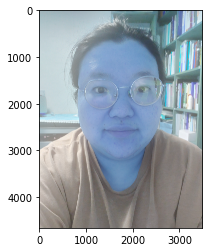

In [269]:
my_image_path = './images/my_face.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

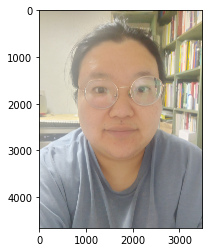

In [270]:
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

# 7-3. 얼굴 검출 face detection

In [271]:
detector_hog = dlib.get_frontal_face_detector()

In [272]:
dlib_rects = detector_hog(img_rgb,1) #dlib은 rgb 형식의 이미지를 받는다. 

rectangles[[(840, 1061) (2827, 3049)]]


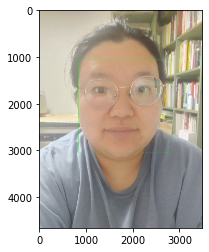

In [273]:
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t),(r,b),(0,255,0),2,lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show,cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 7-4. 얼굴 랜드마크 face landmark

In [274]:
model_path = './models/shape_predictor_68_face_landmarks.dat'

landmark_predictor = dlib.shape_predictor(model_path)

In [275]:
list_landmarks = []

for dlib_rect in dlib_rects:
    #you take an image of a human face as input and are expected to identify the locations of important facial landmarks 
    points = landmark_predictor(img_rgb,dlib_rect) #이미지와 얼굴 형태를 잡아낼 수 있는 dlib_rect를 넣어준다. 
    list_points = list(map(lambda p: (p.x,p.y),points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


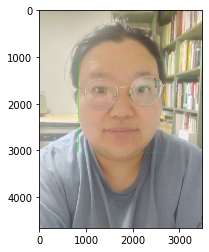

In [276]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show,point,4,(0,0,255),-1) #얼굴이 특징이 되는 점에 원 그려주기 
        
img_show_rgb = cv2.cvtColor(img_show,cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 7-5. 스티커 적용하기

In [277]:
for dlib_rect, landmark in zip(dlib_rects,list_landmarks):
    print(landmark[32]) #아마 설명서에 가서 읽어보면 몇번 인덱스가 얼굴의 어떤 부위를 나타내는지 알 수 있지 않을까?
    x = landmark[32][0] + 70
    y = dlib_rect.height() + dlib_rect.height()//2  + 100
    w = h = dlib_rect.width()
    print("(x,y) : ",x, y)
    print("(w,h) : ",w, h)
    
    

(1657, 2333)
(x,y) :  1727 3083
(w,h) :  1988 1988


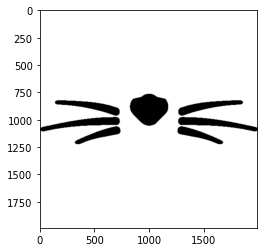

In [278]:
sticker_path = './images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker,(w,h))
#img_sticker = cv2.bitwise_not(img_sticker)
plt.imshow(img_sticker)
plt.show()

In [279]:
refined_x = x- w //2
refined_y = y-h
print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (733,1095)


In [280]:
if refined_x <0:
    img_sticker = img_sticker[:,-refined_x:]
    refined_x = 0
if refined_y <0:
    img_sticker = img_sticker[-refined_y:,:]
    refined_y = 0
    
print (f'(x,y) : ({refined_x},{refined_y})')    

(x,y) : (733,1095)


In [281]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0],refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
#img_sticker = cv2.bitwise_not(img_sticker)
print("슝~")

슝~


In [282]:
temp_result = np.where(img_sticker==0)
print(temp_result)

(array([ 767,  767,  767, ..., 1220, 1220, 1220]), array([ 973,  973,  973, ..., 1655, 1655, 1655]), array([0, 1, 2, ..., 0, 1, 2]))


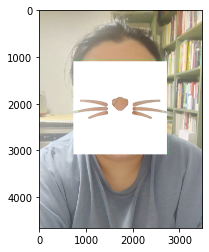

In [283]:
plt.imshow(cv2.cvtColor(img_show,cv2.COLOR_BGR2RGB))
plt.show()

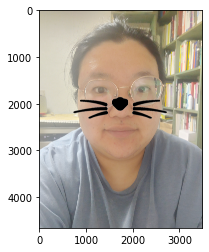

In [284]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

#img_sticker==255를 넣어 검은색인 수염만 보이도록 해주었습니다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

In [285]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib #이미지 처리 및 기계학습, 얼굴인식 등을 할 수 있는 c++로 개발된 고성능의 라이브러리
from math import atan2, degrees

### 아래에서는 고개를 숙이고 있는 이미지를 이용해서 스티커를 회전해서 붙였습니다. 

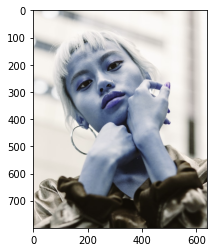

In [2]:
my_image_path = './images/image6.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

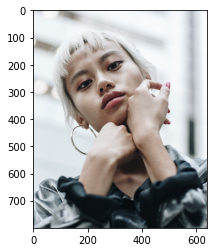

In [3]:
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

# 7-3. 얼굴 검출 face detection

In [4]:
detector_hog = dlib.get_frontal_face_detector()

In [5]:
dlib_rects = detector_hog(img_rgb,1) #dlib은 rgb 형식의 이미지를 받는다. 

rectangles[[(141, 142) (409, 409)]]


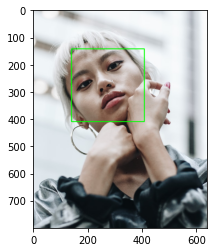

In [6]:
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t),(r,b),(0,255,0),2,lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show,cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 7-4. 얼굴 랜드마크 face landmark

In [7]:
model_path = './models/shape_predictor_68_face_landmarks.dat'

landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
list_landmarks = []

for dlib_rect in dlib_rects:
    #you take an image of a human face as input and are expected to identify the locations of important facial landmarks 
    points = landmark_predictor(img_rgb,dlib_rect) #이미지와 얼굴 형태를 잡아낼 수 있는 dlib_rect를 넣어준다. 
    list_points = list(map(lambda p: (p.x,p.y),points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


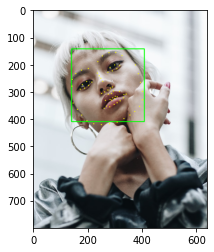

In [9]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show,point,2,(0,255,255),-1) #얼굴이 특징이 되는 점에 원 그려주기 
        
img_show_rgb = cv2.cvtColor(img_show,cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 7-5. 스티커 적용하기

In [10]:
for dlib_rect, landmark in zip(dlib_rects,list_landmarks):
    print(landmark[33]) #아마 설명서에 가서 읽어보면 몇번 인덱스가 얼굴의 어떤 부위를 나타내는지 알 수 있지 않을까?
    x = landmark[33][0]
    y = dlib_rect.height() + dlib_rect.height()//2
    w = h = dlib_rect.width()
    print("(x,y) : ",x, y)
    print("(w,h) : ",w, h)
    
    

(275, 293)
(x,y) :  275 402
(w,h) :  269 269


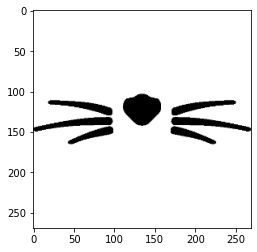

In [11]:
sticker_path = './images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker,(w,h))
plt.imshow(img_sticker)
plt.show()

In [12]:
def angle_value(p1,p2):
        xdiff = p2[0] - p1[0]
        ydiff = p2[1] - p1[1]

        return degrees(atan2(ydiff,xdiff))

In [13]:
#양 눈의 인덱스를 이용해서 각도가 얼마나 틀어져 있는지 구했습니다. 
angle = -angle_value(landmark[36],landmark[45])
w,h ,c = img_sticker.shape
print(w,h,c)
# 이미지 스티커의 높이와 폭을 구한 다음 그 값을 반으로 나눠서 getrotation함수에 넣어주었습니다. 
m = cv2.getRotationMatrix2D((w/2,h/2),angle,1) 

269 269 3


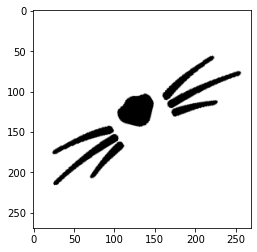

In [14]:
sticker_h,sticker_w,c = img_sticker.shape
#wrapaffine으로 회전을 하고 나면 빈 공간이 생기고 그 공간이 기본은 검은색으로 채워지게 되는데
#wrapaffine 함수의 flags를 이용해 이 공간을 흰색으로 채워주고
#맨 아랫쪽에서 값이 255인 곳을 제외하도록 했습니다. 
img_sticker = cv2.warpAffine(img_sticker, m,(0,0), flags = cv2.INTER_CUBIC,
                                                      borderMode = cv2.BORDER_CONSTANT, borderValue = (255,255,255))
plt.imshow(img_sticker)
plt.show()
#아래의 이미지를 보시면 이미지가 얼굴이 회전한만큼 회전돼서 출력한 것을 보실 수 있습니다. 

In [15]:
refined_x = x- w //2
refined_y = y-h
print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (141,133)


In [16]:
if refined_x <0:
    img_sticker = img_sticker[:,-refined_x:]
    refined_x = 0
if refined_y <0:
    img_sticker = img_sticker[-refined_y:,:]
    refined_y = 0
    
print (f'(x,y) : ({refined_x},{refined_y})')    

(x,y) : (141,133)


In [17]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0],refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
#img_sticker = cv2.bitwise_not(img_sticker)
print("슝~")

슝~


In [18]:
temp_result = np.where(img_sticker==0)
print(temp_result)

(array([ 57,  57,  57, ..., 215, 215, 215]), array([220, 220, 220, ...,  26,  26,  26]), array([0, 1, 2, ..., 0, 1, 2]))


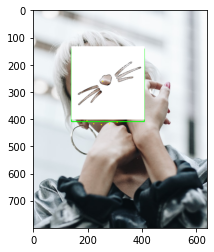

In [19]:
plt.imshow(cv2.cvtColor(img_show,cv2.COLOR_BGR2RGB))
plt.show()

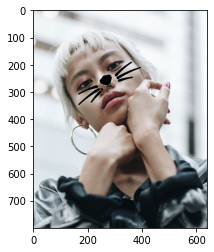

In [20]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()